In [15]:
import matplotlib.pyplot as plot
import numpy as np
import csv
import scipy.stats

average_energy_null_to_cold_process = []
average_energy_null_to_warm_disk_process = []
average_energy_warm_disk_to_warm_cpu_process = []
average_energy_cold_to_warm_disk_process = []

average_energy_active_to_warm_disk_process = []
average_energy_warm_cpu_to_warm_disk_process = []
average_energy_warm_disk_to_cold_process = []
average_energy_cold_to_null_process = []

# Calculate z-value for 90% confidence interval
confidence_level = 0.90
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval

In [16]:
for i in range(1,11):
    file_name = "../../../Measurements/Lifecycle/wifi/resource/mec/x86_pod_1_rep_"+str(i)+"_12_7_2023_12h48.csv"
    energy_null_to_cold_process = []
    energy_warm_disk_to_warm_cpu_process = []
    energy_warm_cpu_to_warm_disk_process = []
    energy_active_to_warm_disk_process = []
    energy_warm_disk_to_cold_process = []
    energy_cold_to_null_process = []

    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[9] == "null_to_cold_process":
                energy_null_to_cold_process.append(float(row[4]))
            elif row[9] == "warm_disk_to_warm_cpu_process":
                energy_warm_disk_to_warm_cpu_process.append(float(row[4]))
            elif row[9] == "warm_cpu_to_warm_disk_process":
                energy_warm_cpu_to_warm_disk_process.append(float(row[4]))
            elif row[9] == "active_to_warm_disk_process":
                energy_active_to_warm_disk_process.append(float(row[4]))
            elif row[9] == "cold_to_null_process":
                energy_cold_to_null_process.append(float(row[4]))
                energy_warm_disk_to_cold_process.append(float(row[4]))
    average_energy_null_to_cold_process.append((energy_null_to_cold_process[-1]-energy_null_to_cold_process[0]))
    average_energy_warm_disk_to_warm_cpu_process.append(energy_warm_disk_to_warm_cpu_process[-1]-energy_warm_disk_to_warm_cpu_process[0])
    average_energy_warm_cpu_to_warm_disk_process.append(energy_warm_cpu_to_warm_disk_process[-1]-energy_warm_cpu_to_warm_disk_process[0])
    average_energy_active_to_warm_disk_process.append(energy_active_to_warm_disk_process[-1]-energy_active_to_warm_disk_process[0])
    average_energy_cold_to_null_process.append(energy_cold_to_null_process[-1]-energy_cold_to_null_process[0])
    average_energy_warm_disk_to_cold_process.append(energy_warm_disk_to_cold_process[-1]-energy_warm_disk_to_cold_process[0])

energy_null_to_cold_process_mean = np.mean(average_energy_null_to_cold_process)
energy_warm_disk_to_warm_cpu_process_mean = np.mean(average_energy_warm_disk_to_warm_cpu_process)
energy_warm_cpu_to_warm_disk_process_mean = np.mean(average_energy_warm_cpu_to_warm_disk_process)
energy_active_to_warm_disk_process_mean = np.mean(average_energy_active_to_warm_disk_process)
energy_cold_to_null_process_mean = np.mean(average_energy_cold_to_null_process)
energy_warm_disk_to_cold_mean = energy_cold_to_null_process_mean

energy_null_to_cold_process_std = np.std(average_energy_null_to_cold_process)/np.sqrt(len(average_energy_null_to_cold_process))*z_value
energy_warm_disk_to_warm_cpu_process_std = np.std(average_energy_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_energy_warm_disk_to_warm_cpu_process))*z_value
energy_warm_cpu_to_warm_disk_process_std= np.std(average_energy_warm_cpu_to_warm_disk_process)/np.sqrt(len(average_energy_warm_cpu_to_warm_disk_process))*z_value
energy_active_to_warm_disk_process_std = np.std(average_energy_active_to_warm_disk_process)/np.sqrt(len(average_energy_active_to_warm_disk_process))*z_value
energy_cold_to_warm_disk_process_std = np.std(average_energy_null_to_warm_disk_process) /np.sqrt(len(average_energy_null_to_warm_disk_process))*z_value
energy_cold_to_null_process_std = np.std(average_energy_cold_to_null_process)/np.sqrt(len(average_energy_cold_to_null_process))*z_value
energy_warm_disk_to_cold_process_std = energy_cold_to_null_process_std*z_value
# energy_null_to_cold_process_std = np.std(average_energy_null_to_cold_process)
# energy_warm_disk_to_warm_cpu_process_std = np.std(average_energy_warm_disk_to_warm_cpu_process)
# energy_warm_cpu_to_warm_disk_process_std = np.std(average_energy_warm_cpu_to_warm_disk_process)
# energy_cold_to_null_process_std = np.std(average_energy_cold_to_null_process)
# energy_warm_disk_to_cold_std = energy_cold_to_null_process_std



c:\Users\kienkauko\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\kienkauko\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\kienkauko\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
# Cold to Warm Disk 
import glob

for i in range(1,11):
    file_name = glob.glob("../../../Measurements/Lifecycle/wifi/resource/mec/warm/x86_pod_1_rep_"+str(i)+"_*")[0]
    energy_null_to_warm_disk_process = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:                
            if row[9] == "cold_to_warm_disk_process":
                energy_null_to_warm_disk_process.append(float(row[4]))
    average_energy_null_to_warm_disk_process.append(energy_null_to_warm_disk_process[-1]-energy_null_to_warm_disk_process[0])

energy_cold_to_warm_disk_process_mean = np.mean(average_energy_null_to_warm_disk_process) - energy_null_to_cold_process_mean - energy_warm_disk_to_warm_cpu_process_mean


# energy_null_to_cold_process_std = np.std(average_energy_null_to_cold_process)
# energy_warm_disk_to_warm_cpu_process_std = np.std(average_energy_warm_disk_to_warm_cpu_process)
# energy_warm_cpu_to_warm_disk_process_std = np.std(average_energy_warm_cpu_to_warm_disk_process)
# energy_cold_to_null_process_std = np.std(average_energy_cold_to_null_process)
# energy_warm_disk_to_cold_std = energy_cold_to_null_process_std



In [18]:
# Time --> Base energy

average_time_null_to_cold_process = []
average_time_warm_disk_to_warm_cpu_process = []
average_time_warm_cpu_to_warm_disk_process = []
average_time_active_to_warm_disk_process = []
average_time_null_to_warm_disk_process = []
# average_time_warm_disk_to_cold_process = []
average_time_cold_to_null_process = []
for i in range(1,11):
    file_name = "../../../Measurements/Lifecycle/wifi/timestamp/mec/time_x86_pod_1_rep_"+str(i)+"_12_7_2023_12h48.csv"
    #PROCESS
    time_null_to_cold_process = []
    time_warm_disk_to_warm_cpu_process = []
    time_warm_cpu_to_warm_disk_process = []
    time_active_to_warm_disk_process = []
    time_cold_to_null_process = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == "null_to_cold_process":
                time_null_to_cold_process.append(float(row[1]))
            elif row[2] == "warm_disk_to_warm_CPU_process":
                time_warm_disk_to_warm_cpu_process.append(float(row[1]))
            elif row[2] == "warm_CPU_to_warm_disk_process":
                time_warm_cpu_to_warm_disk_process.append(float(row[1]))
            elif row[2] == "active_to_warm_disk_process":
                time_active_to_warm_disk_process.append(float(row[1]))
            elif row[2] == "cold_to_null_process":
                time_cold_to_null_process.append(float(row[1]))
        average_time_null_to_cold_process.append(time_null_to_cold_process[-1]-time_null_to_cold_process[0])
        average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
        average_time_warm_cpu_to_warm_disk_process.append(time_warm_cpu_to_warm_disk_process[-1]-time_warm_cpu_to_warm_disk_process[0])
        average_time_active_to_warm_disk_process.append(time_active_to_warm_disk_process[-1]-time_active_to_warm_disk_process[0])
        average_time_cold_to_null_process.append(time_cold_to_null_process[-1]-time_cold_to_null_process[0])

for i in range(1,11):
    file_name = glob.glob("../../../Measurements/Lifecycle/wifi/timestamp/mec/warm/time_x86_pod_1_rep_"+str(i)+"_*")[0]
    # print(file_name)
    time_null_to_warm_disk_process = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:                
            if row[2] == "cold_to_warm_disk":
                time_null_to_warm_disk_process.append(float(row[1]))
    average_time_null_to_warm_disk_process.append(time_null_to_warm_disk_process[-1]- time_null_to_warm_disk_process[0])

# Calculate the average
time_null_to_cold_process_mean = np.mean(average_time_null_to_cold_process)
time_warm_disk_to_warm_cpu_process_mean = np.mean(average_time_warm_disk_to_warm_cpu_process)
time_warm_cpu_to_warm_disk_process_mean = np.mean(average_time_warm_cpu_to_warm_disk_process)
time_active_to_warm_disk_process_mean = np.mean(average_time_active_to_warm_disk_process)

# time_warm_mem_to_warm_disk_process_mean = np.mean(average_time_warm_mem_to_warm_disk_process)
time_cold_to_warm_disk_process_mean = np.mean(average_time_null_to_warm_disk_process) - time_null_to_cold_process_mean - time_warm_disk_to_warm_cpu_process_mean
time_cold_to_null_process_mean = np.mean(average_time_cold_to_null_process)
time_warm_disk_to_cold_process_mean = time_cold_to_null_process_mean
print(time_null_to_cold_process_mean)
print(time_warm_disk_to_warm_cpu_process_mean)
print(time_warm_cpu_to_warm_disk_process_mean)
print(time_cold_to_warm_disk_process_mean)
print(time_cold_to_null_process_mean)



5.8254474401474
7.604045629501343
31.176024532318117
70.02379353046418
1.3983094692230225


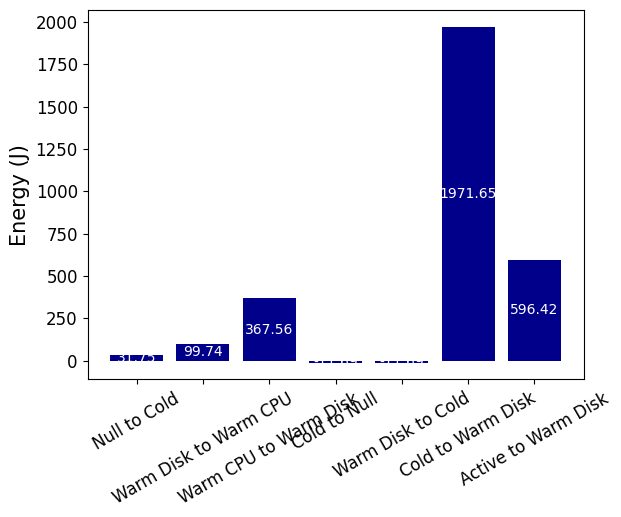

In [19]:
# energy in processes
base_power = 65

energy_null_to_cold_process_mean = energy_null_to_cold_process_mean - base_power*time_null_to_cold_process_mean
energy_warm_disk_to_warm_cpu_process_mean = energy_warm_disk_to_warm_cpu_process_mean - base_power*time_warm_disk_to_warm_cpu_process_mean
energy_warm_cpu_to_warm_disk_process_mean = energy_warm_cpu_to_warm_disk_process_mean - base_power*time_warm_cpu_to_warm_disk_process_mean
energy_active_to_warm_disk_process_mean = energy_active_to_warm_disk_process_mean - base_power*time_active_to_warm_disk_process_mean
energy_cold_to_null_process_mean = energy_cold_to_null_process_mean - base_power*time_cold_to_null_process_mean
energy_warm_disk_to_cold_mean =  energy_cold_to_null_process_mean
energy_cold_to_warm_disk_process_mean = energy_cold_to_warm_disk_process_mean - base_power*time_cold_to_warm_disk_process_mean

# Calculate the standard deviation


data = [energy_null_to_cold_process_mean , energy_warm_disk_to_warm_cpu_process_mean, 
        energy_warm_cpu_to_warm_disk_process_mean, energy_cold_to_null_process_mean, energy_warm_disk_to_cold_mean, energy_cold_to_warm_disk_process_mean, energy_active_to_warm_disk_process_mean]

# error = [energy_null_to_cold_process_std, energy_warm_disk_to_warm_cpu_process_std, 
#         energy_warm_cpu_to_warm_disk_process_std, energy_warm_disk_to_cold_std, 
#         energy_cold_to_null_process_std]
# state = ["$P_n^c$", "$P_c^{wd}$", "$P_{wd}^{wc}$", "$P_{wc}^{wd}$", "$P_{wm}^{wd}$", "$P_a^{wd}$", "$P_{wd}^c$", "$P_c^n$"]
# state = ["Null to Cold", "Cold to Warm Disk", "Warm Disk to Warm CPU", "Warm CPU to Warm Disk", "Warm Mem to Warm Disk", "Active to Warm Disk", "Warm Disk to Cold", "Cold to Null"]
state = ["Null to Cold", "Warm Disk to Warm CPU", "Warm CPU to Warm Disk", "Cold to Null",  "Warm Disk to Cold", "Cold to Warm Disk", "Active to Warm Disk"]

fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data, align='center',
        alpha=0.9)
data_round = [round(x, 2) for x in data]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 10)
# ax1.set_title('Energy in processes')
# ax1.set_xlabel("Processes ($P$)", fontsize = 15)
ax1.set_ylabel("Energy (J)", fontsize = 15)
# plot.xticks(rotation = 15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(state, rotation=30)
# ax1.set_ylim(0,3000)
# plot.yscale('log', base=10)
ax1.tick_params(axis='both', which='major', labelsize=12)
# plot.savefig('../pdf/Energy-processes.pdf', bbox_inches='tight')
plot.show()

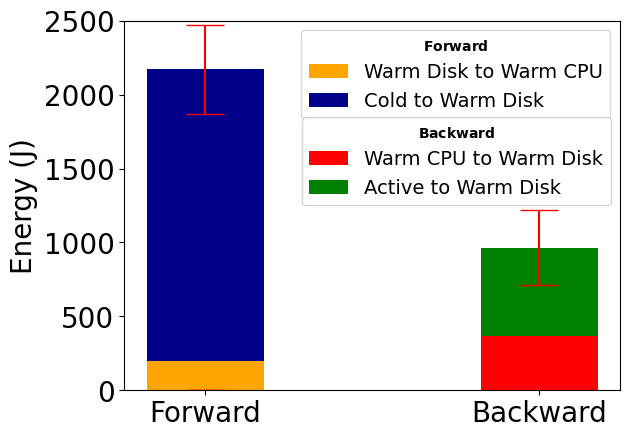

In [24]:
from matplotlib import rc
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# Sample data
categories = ['Forward', 'Backward']

other_forwards =  energy_warm_disk_to_warm_cpu_process_mean + 100
other_backwards = energy_warm_disk_to_cold_mean + energy_cold_to_null_process_mean
column1 = [other_forwards, 0]
column2 = [energy_cold_to_warm_disk_process_mean, 0]
error_1 = energy_cold_to_warm_disk_process_std + energy_warm_disk_to_warm_cpu_process_std
error_2 = energy_warm_disk_to_cold_process_std + energy_cold_to_null_process_std + energy_warm_cpu_to_warm_disk_process_std + energy_active_to_warm_disk_process_std

column3 = [0, energy_warm_cpu_to_warm_disk_process_mean]
column4 = [0, energy_active_to_warm_disk_process_mean]

x = np.arange(len(categories))  # x values for categories

# Create a figure and axis
fig, ax = plot.subplots()

tick_fontsize = 20
label_fontsize = 20
lg_fontsize = 14
cap_size = 14

bar_width = 0.35
# Create stacked bars
bar_1 = ax.bar(x, column1, width=bar_width, label='Warm Disk to Warm CPU', color='orange')
bar_2 = ax.bar(x, column2, width=bar_width, yerr=[300, 0], bottom=column1, color='darkblue', label='Cold to Warm Disk', ecolor='red', capsize=cap_size)
bar_3 = ax.bar(x, column3, width=bar_width, bottom=np.add(column1, column2), color='red', label='Warm CPU to Warm Disk')
bar_4 = ax.bar(x, column4, width=bar_width, yerr=[0, error_2-50], bottom=column3, color='green', label='Active to Warm Disk', ecolor='red', capsize=cap_size)
plot_bar = []
plot_bar.append([bar_1, bar_2, bar_3, bar_4])
# print(plot_bar[0])
ax.set_xticks(x)
ax.set_xticklabels(categories)
# ax.set_xlabel('Direction of Process', fontsize = label_fontsize)
ax.set_ylabel('Energy (J)', fontsize = label_fontsize)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Set the y-axis range
y_min = -0  # Minimum y-axis value
y_max = 2500  # Maximum y-axis value
plot.ylim(y_min, y_max, 6)

# ax.legend()
include = [0,1]
legend1 = ax.legend([plot_bar[0][i] for i in include],[plot_bar[0][i].get_label() for i in include], loc=1, fontsize=lg_fontsize, title="$\\bf{Forward}$")
legend_location = (0.358, 0.5)
legend2 = ax.legend([plot_bar[0][i] for i in [2,3]],[plot_bar[0][i].get_label() for i in [2,3]], loc=legend_location, fontsize=lg_fontsize, title="$\\bf{Backward}$")
plot.gca().add_artist(legend1)
plot.savefig('./new/energy-mec.pdf', bbox_inches='tight')
# plot.title('Stacked Bar Chart')
plot.show()

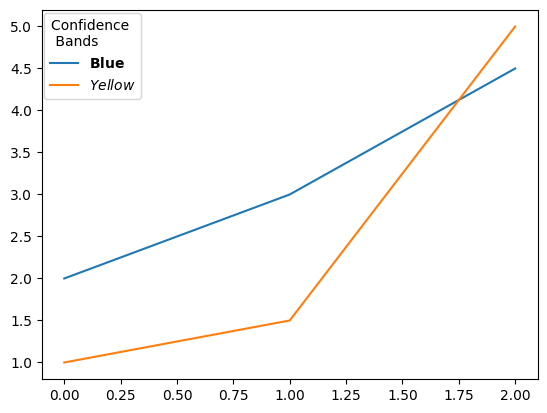

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

y1 = [2, 3, 4.5]   
y2 = [1, 1.5, 5]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y1,label = "$\\bf{Blue}$") 
ax.plot(y2,label = "$\\it{Yellow}$")   
ax.legend(
           bbox_to_anchor=(0.2, 0.99),
            borderaxespad=0.0,
            title="Confidence \n Bands",
            fancybox=True) 
plt.show() 